In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import sparse
import os
% matplotlib inline

In [2]:
dwpc_df = pd.read_csv('rephetio-DWPCs-hetmech.tsv', sep='\t')

In [3]:
dwpc_df.head()

,compound,disease,CbGaD,CbGdD,CbGuD,CdGaD,CdGdD,CdGuD,CpDrD,CrCpD,...,CuGuDlAlD,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,DB00014,DOID:0050156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.002885,0.0,0.000216,0.000662,0.001791
1,DB00014,DOID:0050425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000230,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,DB00014,DOID:0050741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001057,0.0,0.0,0.000413,0.0,0.000000,0.0,0.000000,0.000212,0.001160
3,DB00014,DOID:0050742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.008050,0.0,0.000000,0.000816,0.001002
4,DB00014,DOID:0060073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [4]:
dwpc_data = dwpc_df.loc[:, 'CbGaD':]

In [5]:
average_nnz = numpy.mean((dwpc_data != 0).sum(axis=0))

In [6]:
# Average density
average_nnz / dwpc_df.shape[0]

0.19900600184716746

In [7]:
metapath_density_df = (pd.DataFrame((dwpc_data != 0).sum(axis=0) / dwpc_df.shape[0])
                    .reset_index()
                    .rename(columns={'index': 'metapath', 0: 'density'}))

In [8]:
metapath_density_df.sort_values(by='density', ascending=False).head()

,metapath,density
253,CbGeAeGaD,0.872799
257,CbGeAuGaD,0.870786
250,CbGeAdGaD,0.870146
273,CbGiGeAlD,0.859955
284,CbGpBPpGaD,0.859696


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff354e50b38>]],
      dtype=object)

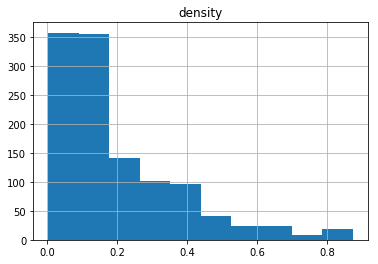

In [9]:
metapath_density_df.hist(column='density')

## Sparse matrix file size by density

In [10]:
for i in range(10, 100, 10):
    example_matrix = numpy.random.rand(10000, 10000)
    example_matrix[example_matrix > i / 100] = 0
    sparse_matrix = sparse.csc_matrix(example_matrix)
    sparse.save_npz(f'sparse_{i}.npz', sparse_matrix)
    del example_matrix, sparse_matrix

In [12]:
sizes = []
for i in range(10, 100, 10):
    size = os.path.getsize(f'sparse_{i}.npz') / 1000000
    sizes.append([i, size])
    print(f"{i} density: {size :.4g} MB")

sizes = numpy.array(sizes)

10 density: 93.34 MB
20 density: 186.5 MB
30 density: 279.2 MB
40 density: 368 MB
50 density: 461.5 MB
60 density: 546.7 MB
70 density: 623.3 MB
80 density: 688.4 MB
90 density: 804 MB


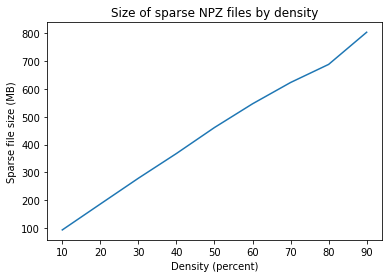

In [22]:
plt.plot(sizes[:, 0], sizes[:, 1])
plt.xlabel('Density (percent)')
plt.ylabel('Sparse file size (MB)')
plt.title('Size of sparse NPZ files by density');